Outcome
0    500
1    268
Name: count, dtype: int64


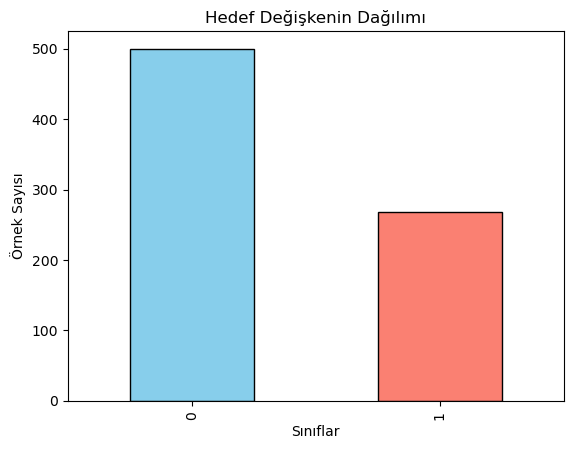

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

# Veri setini yükleyin (örneğin CSV dosyasından)  Outcome
df = pd.read_csv('diabetes.csv')

# Hedef değişkenin (target) dağılımını kontrol et
class_distribution = df['Outcome'].value_counts()

# Dağılımı yazdır
print(class_distribution)

# Dağılımı grafikle göster
class_distribution.plot(kind='bar',color=['skyblue', 'salmon'], edgecolor='black')

# Grafik başlığı ve etiketler
plt.title('Hedef Değişkenin Dağılımı')
plt.xlabel('Sınıflar')
plt.ylabel('Örnek Sayısı')

# Grafiği göster
plt.show()

  DENGESİZ VERİ SETİ OLUŞTURMA

Outcome
0    500
1    200
Name: count, dtype: int64


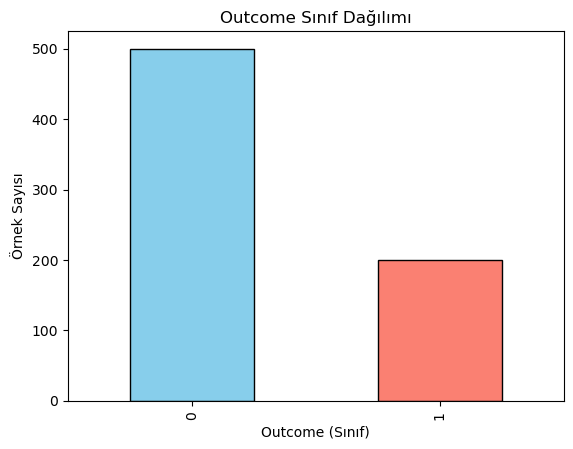

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Veri setini yükleyin
df = pd.read_csv('diabetes.csv')

# Azınlık sınıfı (target == 1) ve baskın sınıfı (target == 0) ayıralım
minority_class = df[df['Outcome'] == 1]
majority_class = df[df['Outcome'] == 0]

# Azınlık sınıfını (1) 25 örneğe indirgemek
minority_undersampled = resample(minority_class,
                                 replace=False,  # Aynı örnekleri çoğaltma
                                 n_samples=200,  # 1 sınıfının örnek sayısını 25'e indirmek
                                 random_state=42)

# Azınlık sınıfı (1) ve baskın sınıfı (0) birleştirelim
df_undersampled = pd.concat([majority_class, minority_undersampled])

# Yeni sınıf dağılımını kontrol edelim
print(df_undersampled['Outcome'].value_counts())

# Sınıf dağılımını görselleştirelim
class_distribution = df_undersampled['Outcome'].value_counts()

# Bar grafiği oluşturma
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Grafik başlığı ve etiketler
plt.title('Outcome Sınıf Dağılımı')
plt.xlabel('Outcome (Sınıf)')
plt.ylabel('Örnek Sayısı')

# Grafiği göster
plt.show()

# Yeni veri setini bir CSV dosyasına kaydedelim
df_undersampled.to_csv('diabetes_1.csv', index=False)


       Dengesiz veri seti üzerinde makine öğrenmesi

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Veri setini yükleyelim
df = pd.read_csv('diabetes_1.csv')

# Özellikler (X) ve hedef değişkeni (y) ayırma
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Veri setini eğitim (%80) ve test (%20) olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelleri tanımlama
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Support Vector Machine": SVC(random_state=42)
}

# Sonuçları saklamak için bir sözlük
results = {}

# Modelleri eğitme ve değerlendirme
for name, model in models.items():
    # Modeli eğitme
    model.fit(X_train_scaled, y_train)
    
    # Tahmin yapma
    y_pred = model.predict(X_test_scaled)
    
    # Değerlendirme metrikleri
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": report
    }
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# En iyi modeli seçme
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model_accuracy = results[best_model_name]['accuracy']

print(f"\nEn iyi model: {best_model_name} (Accuracy: {best_model_accuracy:.2f})")


Model: Logistic Regression
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       102
           1       0.70      0.50      0.58        38

    accuracy                           0.81       140
   macro avg       0.77      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140

--------------------------------------------------
Model: Random Forest
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       102
           1       0.72      0.47      0.57        38

    accuracy                           0.81       140
   macro avg       0.77      0.70      0.72       140
weighted avg       0.80      0.81      0.79       140

--------------------------------------------------
Model: Support Vector Machine
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   suppor

   dengeli veri seti oluşturma    Undersampling (Çoğunluk Sınıfını Azaltma)

Outcome
0    200
1    200
Name: count, dtype: int64


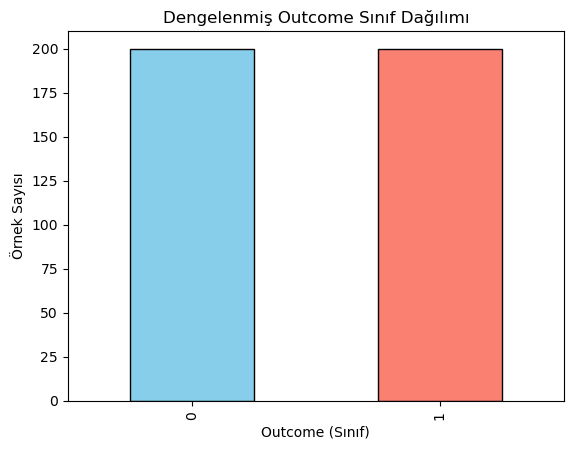

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Veri setini yükleyelim
df = pd.read_csv('diabetes_1.csv')

# Azınlık sınıfı (Outcome == 1) ve baskın sınıfı (Outcome == 0) ayırma
minority_class = df[df['Outcome'] == 1]
majority_class = df[df['Outcome'] == 0]

# Çoğunluk sınıfını azınlık sınıfına eşitlemek için undersample
majority_undersampled = resample(majority_class,
                                  replace=False,  # Aynı örnekleri tekrar etme
                                  n_samples=len(minority_class),  # 200'e eşitle
                                  random_state=42)

# Yeni dengeli veri seti oluşturma
df_balanced = pd.concat([majority_undersampled, minority_class])

# Yeni sınıf dağılımını kontrol etme
print(df_balanced['Outcome'].value_counts())

# Yeni veri setini CSV olarak kaydetme
df_balanced.to_csv('diabetes_balanced.csv', index=False)

# Sınıf dağılımını görselleştirme
class_distribution = df_balanced['Outcome'].value_counts()

# Bar grafiği oluşturma
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Grafik başlığı ve etiketler
plt.title('Dengelenmiş Outcome Sınıf Dağılımı')
plt.xlabel('Outcome (Sınıf)')
plt.ylabel('Örnek Sayısı')

# Grafiği göster
plt.show()


     Dengelenmiş veriseti üzerinde makine öğrenmesi


Logistic Regression Modeli
Test Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        62
           1       0.78      0.72      0.75        58

    accuracy                           0.77       120
   macro avg       0.77      0.77      0.77       120
weighted avg       0.77      0.77      0.77       120


Decision Tree Modeli
Test Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        62
           1       0.60      0.71      0.65        58

    accuracy                           0.63       120
   macro avg       0.64      0.64      0.63       120
weighted avg       0.64      0.63      0.63       120


Random Forest Modeli
Test Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        62
           1       0.80      0.76      0.78        58

    accuracy                           0.79       

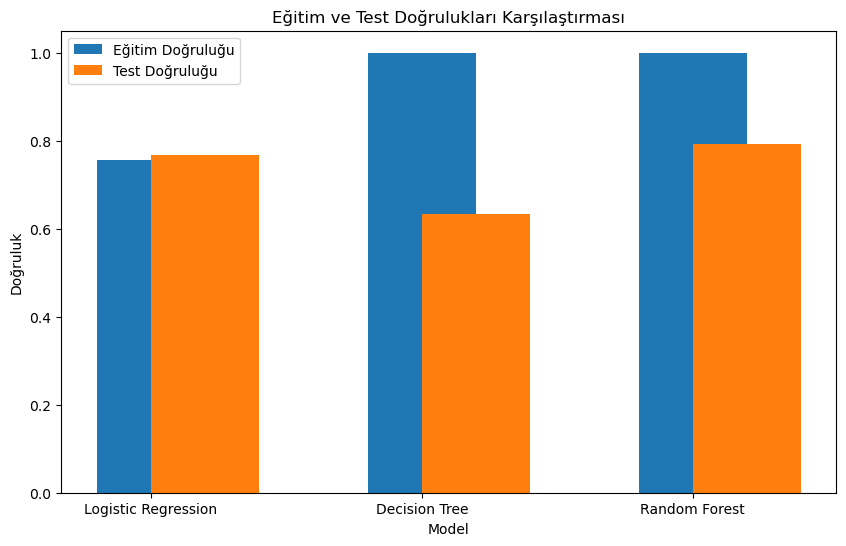


Overfitting yok: Logistic Regression

Overfitting tespit edildi: Decision Tree

Overfitting tespit edildi: Random Forest


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Dengelenmiş veri setini yükle
df_balanced = pd.read_csv('diabetes_balanced.csv')

# Özellikler ve hedef değişkeni ayırma
X = df_balanced.drop(columns=['Outcome'])
y = df_balanced['Outcome']

# Eğitim ve test setlerine ayırma (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelleri tanımlama
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Eğitim ve test doğruluklarını saklayacak sözlükler
train_accuracies = {}
test_accuracies = {}

# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    print(f"\n{name} Modeli")
    # Modeli eğit
    model.fit(X_train, y_train)
    
    # Eğitim doğruluğu
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies[name] = train_accuracy
    
    # Test doğruluğu
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies[name] = test_accuracy
    
    # Performans değerlendirme
    accuracy = accuracy_score(y_test, test_pred)
    print(f"Test Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, test_pred))
    
    # Sonuçları saklama
    results[name] = accuracy

# En iyi modeli seçme
best_model = max(results, key=results.get)
print(f"\nEn iyi model: {best_model} - Doğruluk: {results[best_model]:.2f}")

# Eğitim ve test doğruluklarını grafikle görselleştirme
plt.figure(figsize=(10, 6))
models_list = list(models.keys())
train_acc_values = [train_accuracies[model] for model in models_list]
test_acc_values = [test_accuracies[model] for model in models_list]

plt.bar(models_list, train_acc_values, width=0.4, label='Eğitim Doğruluğu', align='center')
plt.bar(models_list, test_acc_values, width=0.4, label='Test Doğruluğu', align='edge')

plt.xlabel('Model')
plt.ylabel('Doğruluk')
plt.title('Eğitim ve Test Doğrulukları Karşılaştırması')
plt.legend()
plt.show()

# Overfitting kontrolü
for name in models_list:
    if train_accuracies[name] - test_accuracies[name] > 0.1:  # Büyük fark overfitting göstergesi
        print(f"\nOverfitting tespit edildi: {name}")
    else:
        print(f"\nOverfitting yok: {name}")


    DENGELENMEMİŞ VERİ SETİ İLE DENGELENMİŞ VERİ SETİNİ KARŞILAŞTIRMA MAKİNE ÖĞRENMESİNDE

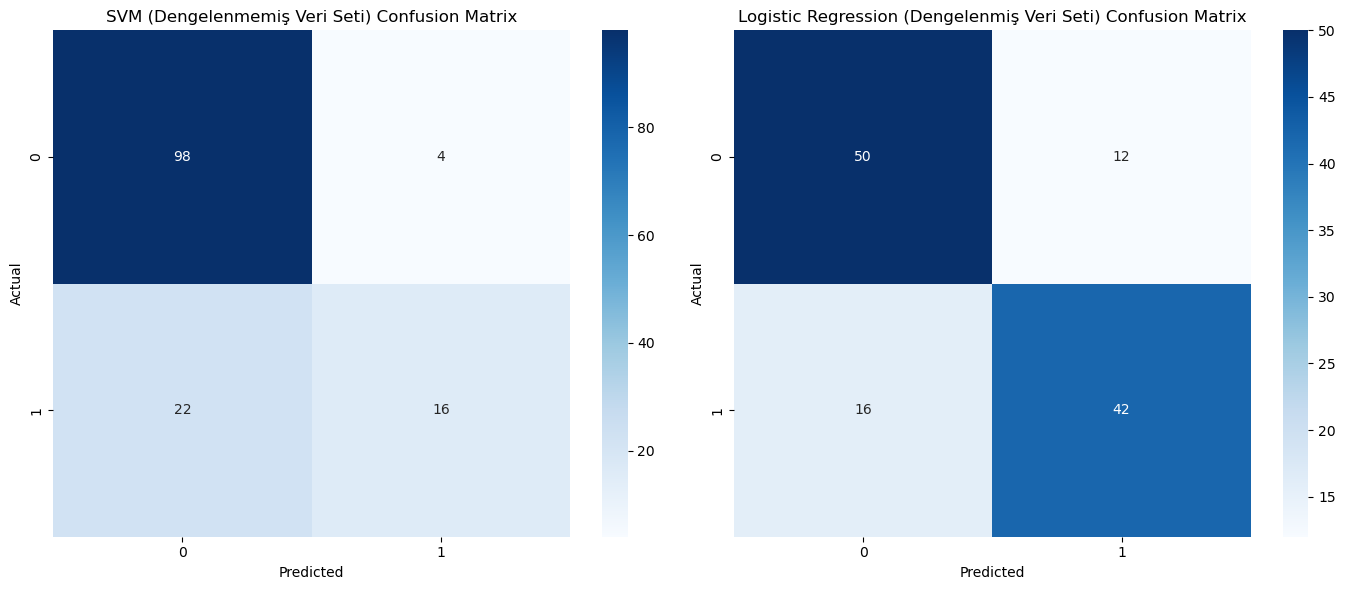

SVM Modeli (Dengelenmemiş Veri Seti): 0 sınıfı doğruluğu = 0.96, 1 sınıfı doğruluğu = 0.42
Logistic Regression Modeli (Dengelenmiş Veri Seti): 0 sınıfı doğruluğu = 0.81, 1 sınıfı doğruluğu = 0.72


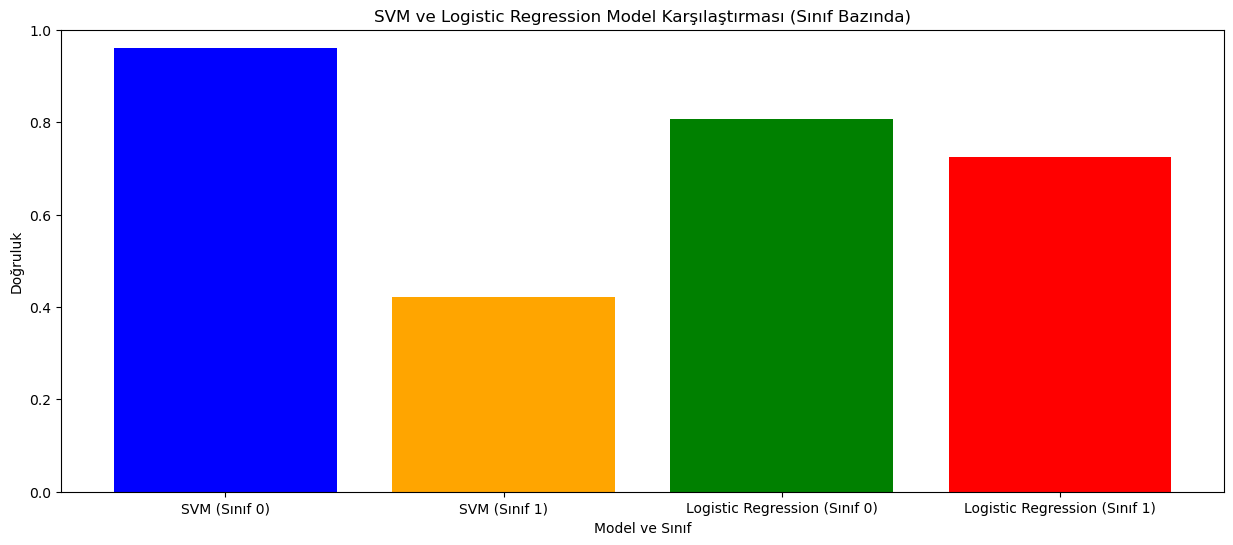

In [27]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Orijinal (dengesiz) veri setini yükleyelim (SVM için)
df = pd.read_csv('diabetes_1.csv')

# Özellikler (X) ve hedef değişkeni (y) ayırma
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: SVM ile çalıştırma (Dengelenmemiş veri seti)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

# SVM Test Doğruluğu ve Confusion Matrix
y_pred_svm = svm.predict(X_test_scaled)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Model 2: Logistic Regression ile çalıştırma (Dengelenmiş veri seti)
df_balanced = pd.read_csv('diabetes_balanced.csv')  # Dengelenmiş veri seti

# Özellikler (X) ve hedef değişkeni (y) ayırma
X_balanced = df_balanced.drop('Outcome', axis=1)
y_balanced = df_balanced['Outcome']

# Eğitim ve test setlerine ayırma (%70 eğitim, %30 test)
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_balanced_scaled = scaler.transform(X_test_balanced)

# Logistic Regression Modelini oluşturma (Dengelenmiş veri ile)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_balanced_scaled, y_train_balanced)

# Logistic Regression Test Doğruluğu ve Confusion Matrix
y_pred_log_reg = log_reg.predict(X_test_balanced_scaled)
cm_log_reg = confusion_matrix(y_test_balanced, y_pred_log_reg)

# Sonuçları görselleştirme - Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# SVM Confusion Matrix (Dengelenmemiş veri seti)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[0])
axes[0].set_title('SVM (Dengelenmemiş Veri Seti) Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression Confusion Matrix (Dengelenmiş veri seti)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[1])
axes[1].set_title('Logistic Regression (Dengelenmiş Veri Seti) Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Doğruluklar
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_log_reg = accuracy_score(y_test_balanced, y_pred_log_reg)

# 1 ve 0 için doğruluk hesaplama
svm_class_0_accuracy = cm_svm[0][0] / (cm_svm[0][0] + cm_svm[0][1])  # 0 sınıfı doğruluğu
svm_class_1_accuracy = cm_svm[1][1] / (cm_svm[1][0] + cm_svm[1][1])  # 1 sınıfı doğruluğu

log_reg_class_0_accuracy = cm_log_reg[0][0] / (cm_log_reg[0][0] + cm_log_reg[0][1])  # 0 sınıfı doğruluğu
log_reg_class_1_accuracy = cm_log_reg[1][1] / (cm_log_reg[1][0] + cm_log_reg[1][1])  # 1 sınıfı doğruluğu

# Sonuçları yazdıralım
print(f"SVM Modeli (Dengelenmemiş Veri Seti): 0 sınıfı doğruluğu = {svm_class_0_accuracy:.2f}, 1 sınıfı doğruluğu = {svm_class_1_accuracy:.2f}")
print(f"Logistic Regression Modeli (Dengelenmiş Veri Seti): 0 sınıfı doğruluğu = {log_reg_class_0_accuracy:.2f}, 1 sınıfı doğruluğu = {log_reg_class_1_accuracy:.2f}")

# Grafik ile karşılaştırma
models = ['SVM (Sınıf 0)', 'SVM (Sınıf 1)', 'Logistic Regression (Sınıf 0)', 'Logistic Regression (Sınıf 1)']
accuracies = [svm_class_0_accuracy, svm_class_1_accuracy, log_reg_class_0_accuracy, log_reg_class_1_accuracy]

plt.figure(figsize=(15, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Model ve Sınıf')
plt.ylabel('Doğruluk')
plt.title('SVM ve Logistic Regression Model Karşılaştırması (Sınıf Bazında)')
plt.ylim([0, 1])
plt.show()
